# Agri-food CO2 emission

Aproveitando o aprendizado de máquina para prever emissões agrícolas de CO2, IPCC/FAO

[https://www.kaggle.com/datasets/alessandrolobello/agri-food-co2-emission-dataset-forecasting-ml](https://www.kaggle.com/datasets/alessandrolobello/agri-food-co2-emission-dataset-forecasting-ml)

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [92]:
def regressão_linear(tabela):
    X = tabela.drop('total_emission', axis=1)
    y = tabela['total_emission']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    reg = LinearRegression().fit(X_train, y_train)
    
    prev_test = reg.predict(X_test)
    
    plt.scatter(y_test/5,prev_test/5)
    plt.plot([0,700000],[0,700000],'--r')
    plt.show()
    
    print('='*100)
    print(reg.score(X_train, y_train), reg.score(X_test, y_test))
    print('='*100)
    print(mean_absolute_error(y_test, prev_test))
    print('='*100)
    print(mean_squared_error(y_test, prev_test))
    print('='*100)
    print(np.sqrt(mean_squared_error(y_test, prev_test)))
    print('='*100)
          
def arvore_decisao(tabela, max_depth=None, criterion='squared_error', splitter='best'):
    X = tabela.drop('total_emission', axis=1)
    y = tabela['total_emission']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    reg = DecisionTreeRegressor(max_depth=max_depth, criterion=criterion, splitter=splitter, random_state=42).fit(X_train, y_train)
    
    prev_test = reg.predict(X_test)
    
    plt.scatter(y_test/5,prev_test/5)
    plt.plot([0,700000],[0,700000],'--r')
    plt.show()
    
    print('='*100)
    print(reg.score(X_train, y_train), reg.score(X_test, y_test))
    print('='*100)
    print(mean_absolute_error(y_test, prev_test))
    print('='*100)
    print(mean_squared_error(y_test, prev_test))
    print('='*100)
    print(np.sqrt(mean_squared_error(y_test, prev_test)))
    print('='*100)

def floresta_aleatoria(tabela, max_depth=None, criterion='squared_error'):
    X = tabela.drop('total_emission', axis=1)
    y = tabela['total_emission']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    reg = RandomForestRegressor(max_depth=max_depth, criterion=criterion, random_state=42).fit(X_train, y_train)
    
    prev_test = reg.predict(X_test)
    
    plt.scatter(y_test/5,prev_test/5)
    plt.plot([0,700000],[0,700000],'--r')
    plt.show()
    
    print('='*100)
    print(reg.score(X_train, y_train), reg.score(X_test, y_test))
    print('='*100)
    print(mean_absolute_error(y_test, prev_test))
    print('='*100)
    print(mean_squared_error(y_test, prev_test))
    print('='*100)
    print(np.sqrt(mean_squared_error(y_test, prev_test)))
    print('='*100)

def knn(tabela, n_neighbors=5, weights='uniform', algorithm='auto', p=2):
    X = tabela.drop('total_emission', axis=1)
    y = tabela['total_emission']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    reg = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, p=p).fit(X_train, y_train)
    
    prev_test = reg.predict(X_test)
    
    plt.scatter(y_test/5,prev_test/5)
    plt.plot([0,700000],[0,700000],'--r')
    plt.show()
    
    print('='*100)
    print(reg.score(X_train, y_train), reg.score(X_test, y_test))
    print('='*100)
    print(mean_absolute_error(y_test, prev_test))
    print('='*100)
    print(mean_squared_error(y_test, prev_test))
    print('='*100)
    print(np.sqrt(mean_squared_error(y_test, prev_test)))
    print('='*100)

In [3]:
base = pd.read_csv('Agrofood_co2_emission.csv')
base.head(3)

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583


In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [5]:
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False)

Crop Residues                      0.199426
On-farm energy use                 0.137258
Manure applied to Soils            0.133238
Manure Management                  0.133238
IPPU                               0.106676
Net Forest conversion              0.070782
Forestland                         0.070782
Food Household Consumption         0.067911
Fires in humid tropical forests    0.022254
Forest fires                       0.013352
Savanna fires                      0.004451
Total Population - Male            0.000000
Urban population                   0.000000
Total Population - Female          0.000000
total_emission                     0.000000
Rural population                   0.000000
Fires in organic soils             0.000000
Manure left on Pasture             0.000000
Area                               0.000000
Agrifood Systems Waste Disposal    0.000000
Fertilizers Manufacturing          0.000000
Food Processing                    0.000000
Year                            

In [6]:
colunas = base.columns[(base.isnull().sum()/base.shape[0]) > 0.1]

In [7]:
base.drop(colunas, axis=1, inplace=True)

In [8]:
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False)

Forestland                         0.070782
Net Forest conversion              0.070782
Food Household Consumption         0.067911
Fires in humid tropical forests    0.022254
Forest fires                       0.013352
Savanna fires                      0.004451
Area                               0.000000
Fertilizers Manufacturing          0.000000
total_emission                     0.000000
Total Population - Female          0.000000
Total Population - Male            0.000000
Urban population                   0.000000
Rural population                   0.000000
Fires in organic soils             0.000000
Manure left on Pasture             0.000000
Food Packaging                     0.000000
Food Processing                    0.000000
Agrifood Systems Waste Disposal    0.000000
Year                               0.000000
On-farm Electricity Use            0.000000
Food Retail                        0.000000
Food Transport                     0.000000
Pesticides Manufacturing        

In [9]:
base.shape

(6965, 26)

In [10]:
base.fillna(-1, inplace=True)

In [11]:
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False)

Area                               0.0
Year                               0.0
total_emission                     0.0
Total Population - Female          0.0
Total Population - Male            0.0
Urban population                   0.0
Rural population                   0.0
Fires in humid tropical forests    0.0
Fires in organic soils             0.0
Manure left on Pasture             0.0
Fertilizers Manufacturing          0.0
Food Processing                    0.0
Agrifood Systems Waste Disposal    0.0
Food Packaging                     0.0
On-farm Electricity Use            0.0
Food Retail                        0.0
Food Household Consumption         0.0
Net Forest conversion              0.0
Forestland                         0.0
Food Transport                     0.0
Pesticides Manufacturing           0.0
Drained organic soils (CO2)        0.0
Rice Cultivation                   0.0
Forest fires                       0.0
Savanna fires                      0.0
Average Temperature °C   

In [12]:
base.drop('Area', axis=1, inplace=True)

In [13]:
base2 = base.drop('total_emission', axis=1)

In [14]:
lista1 = ['total_emission']
lista2 = ['total_emission']
lista3 = ['total_emission']
lista4 = ['total_emission']
lista5 = ['total_emission']

In [15]:
for i, col in enumerate(base2.columns):
    if i < 5:
        lista1.append(col)
    elif i >= 5 and i < 10:
        lista2.append(col)
    elif i >= 10 and i < 15:
        lista3.append(col)
    elif i >= 15 and i < 20:
        lista4.append(col)
    else:
        lista5.append(col)

In [16]:
df1 = base[lista1]
df2 = base[lista2]
df3 = base[lista3]
df4 = base[lista4]
df5 = base[lista5]

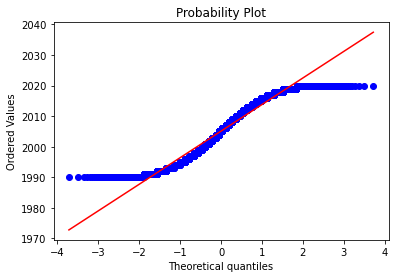

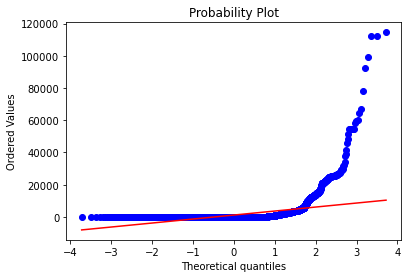

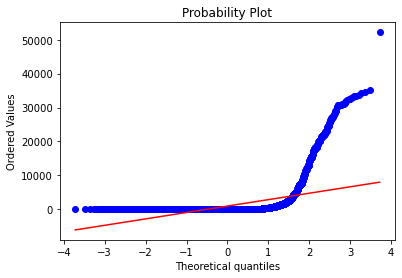

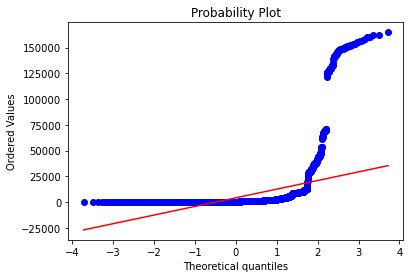

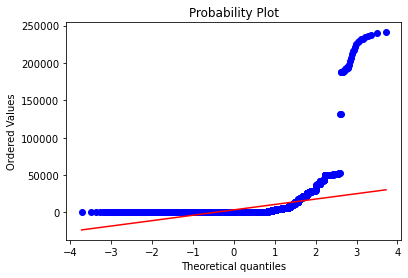

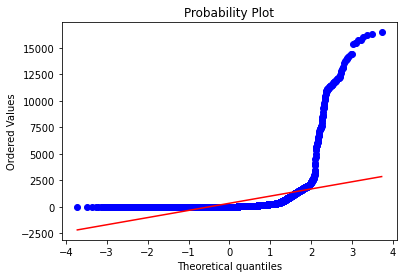

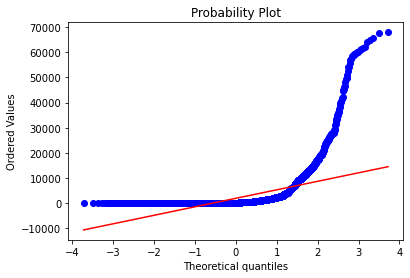

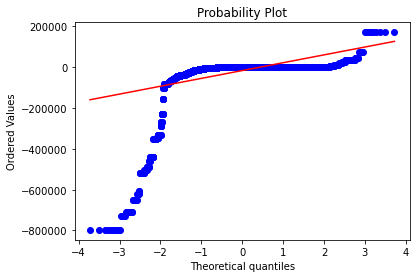

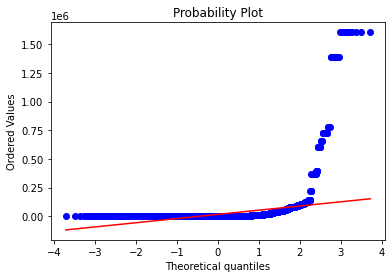

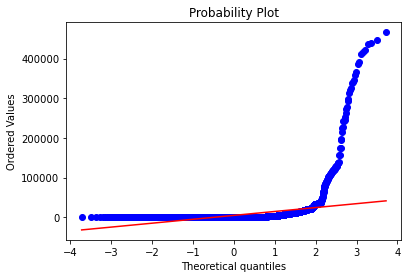

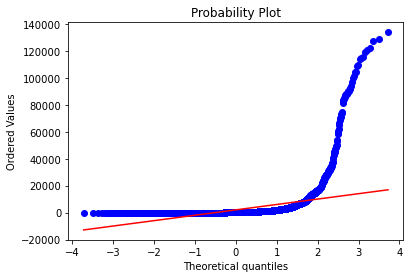

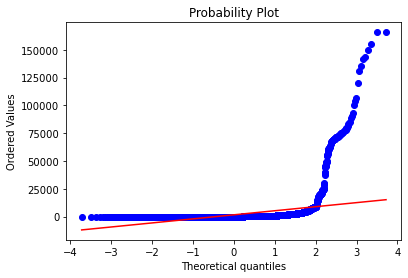

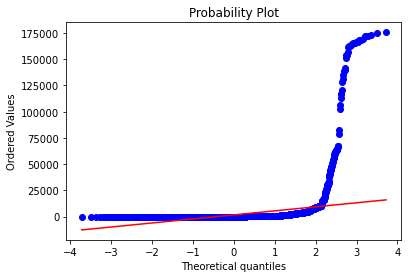

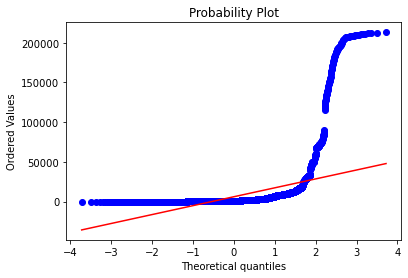

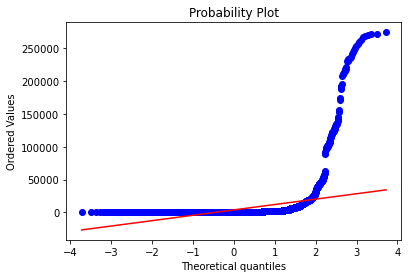

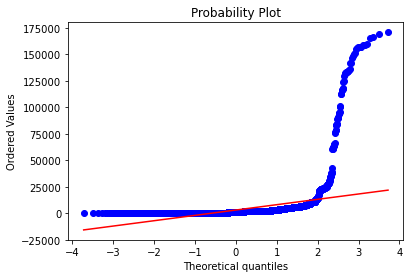

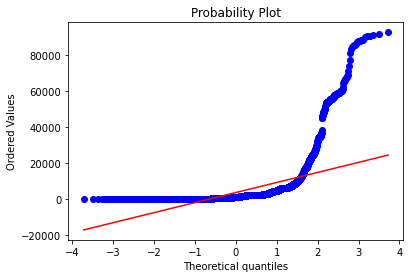

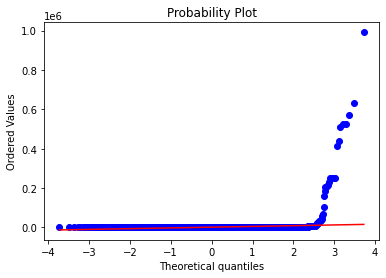

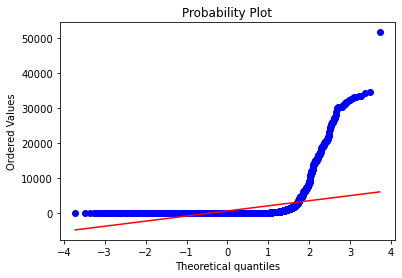

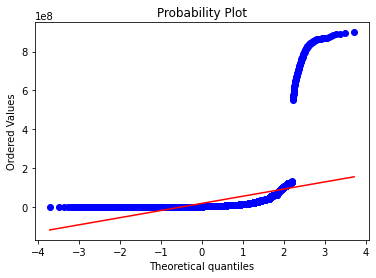

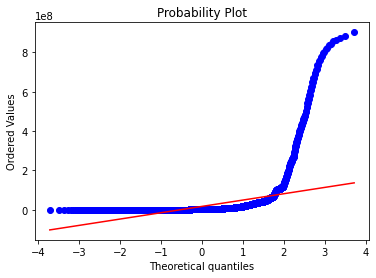

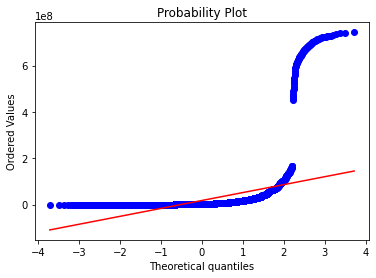

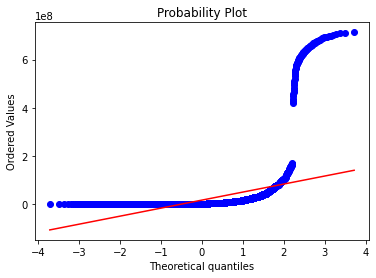

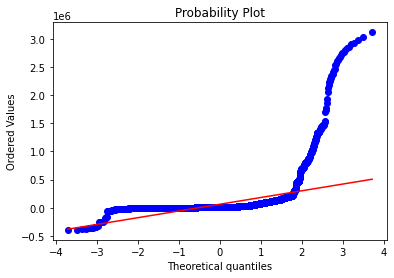

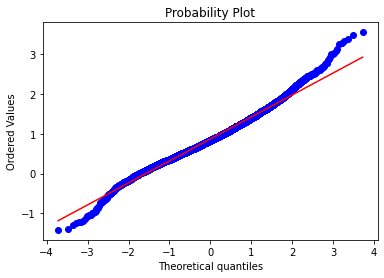

In [17]:
for col in base.columns:
    stats.probplot(base[col], plot=plt)
    plt.show()

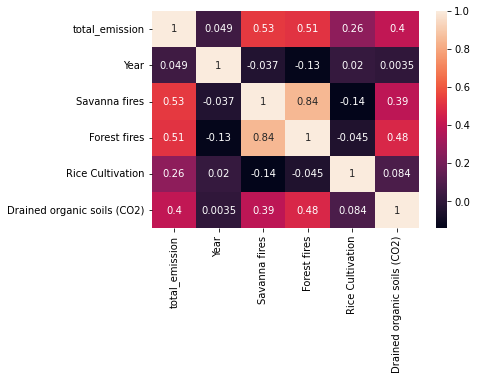

In [18]:
sns.heatmap(df1.corr(method='spearman'), annot=True)
plt.show()

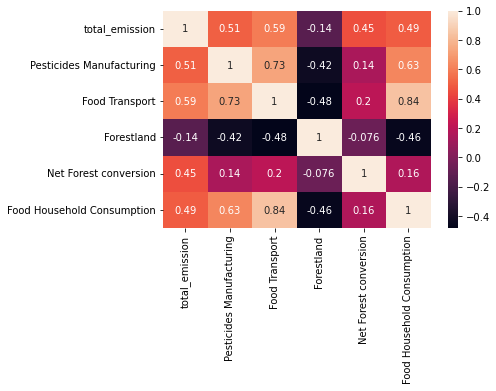

In [19]:
sns.heatmap(df2.corr(method='spearman'), annot=True)
plt.show()

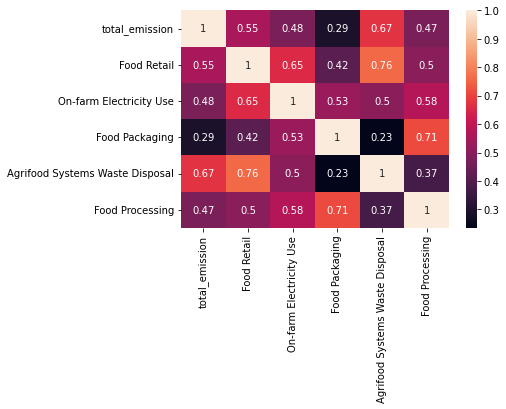

In [20]:
sns.heatmap(df3.corr(method='spearman'), annot=True)
plt.show()

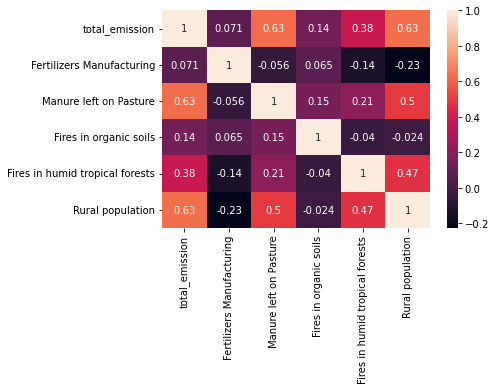

In [21]:
sns.heatmap(df4.corr(method='spearman'), annot=True)
plt.show()

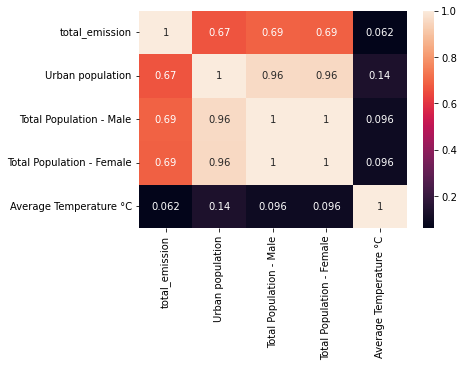

In [22]:
sns.heatmap(df5.corr(method='spearman'), annot=True)
plt.show()

In [23]:
df5.head(1)

,total_emission,Urban population,Total Population - Male,Total Population - Female,Average Temperature °C
0,2198.963539,2593947.0,5348387.0,5346409.0,0.536167


In [24]:
base2 = base[['total_emission', 'Savanna fires', 'Forest fires', 'Pesticides Manufacturing',
     'Food Transport', 'Food Retail', 'Agrifood Systems Waste Disposal', 'Manure left on Pasture',
     'Rural population', 'Urban population', 'Total Population - Male', 'Total Population - Female']]

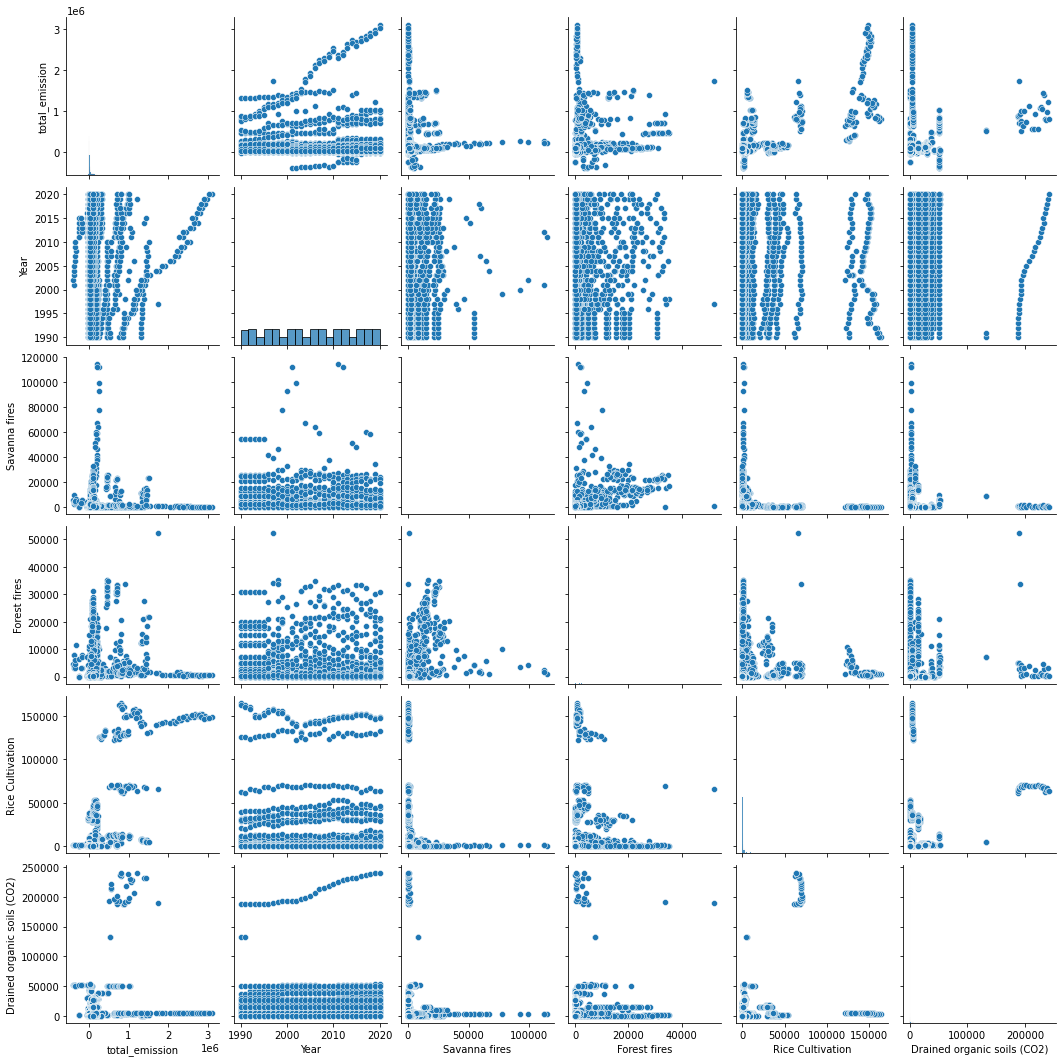

In [25]:
sns.pairplot(df1)
plt.show()

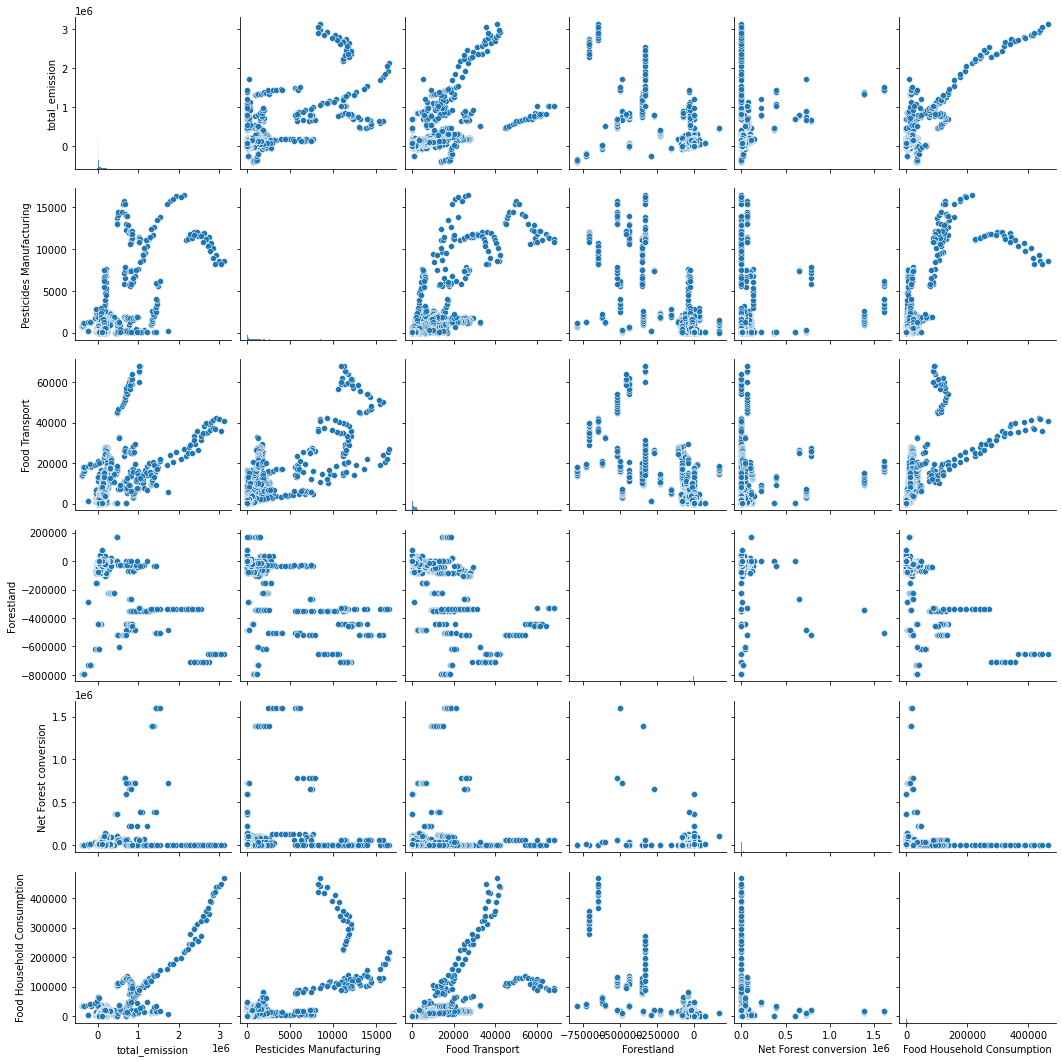

In [26]:
sns.pairplot(df2)
plt.show()

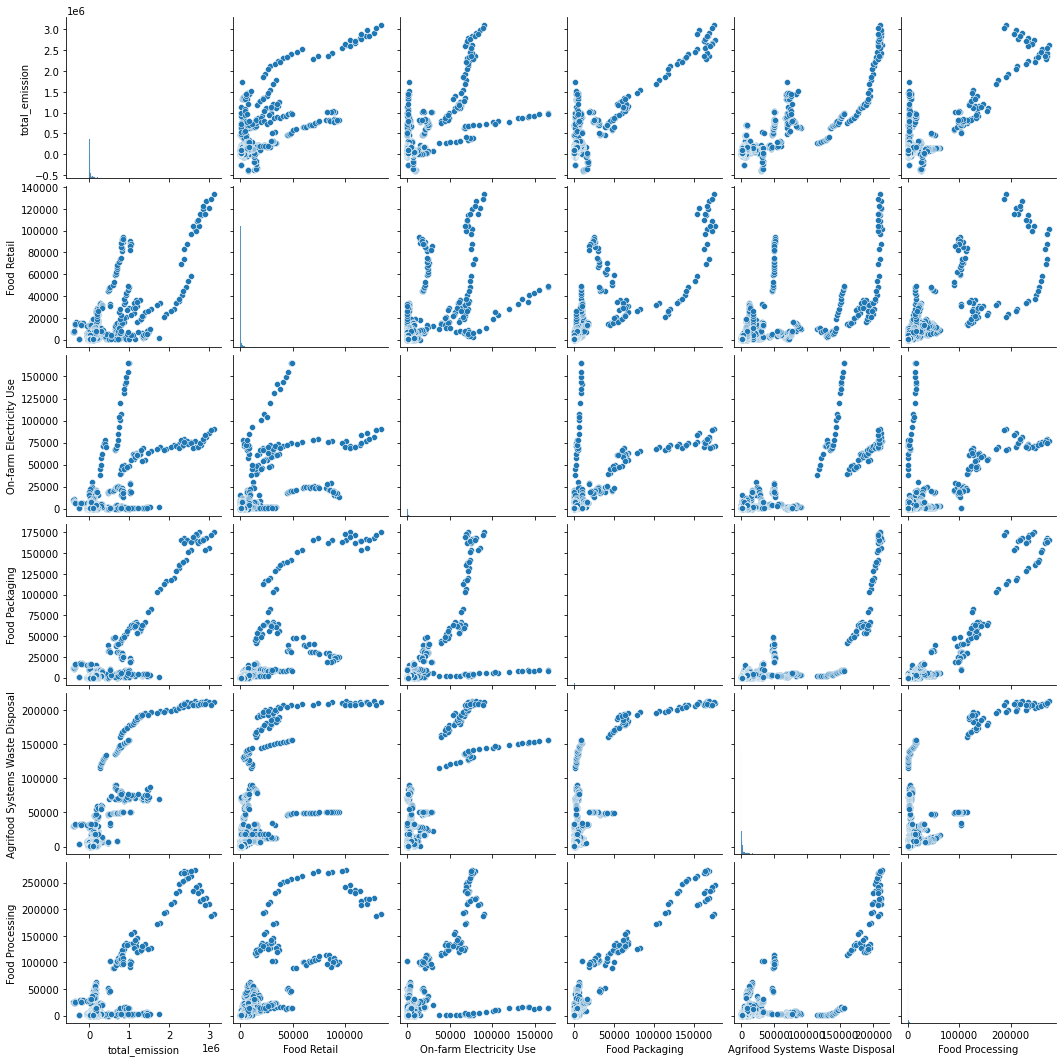

In [27]:
sns.pairplot(df3)
plt.show()

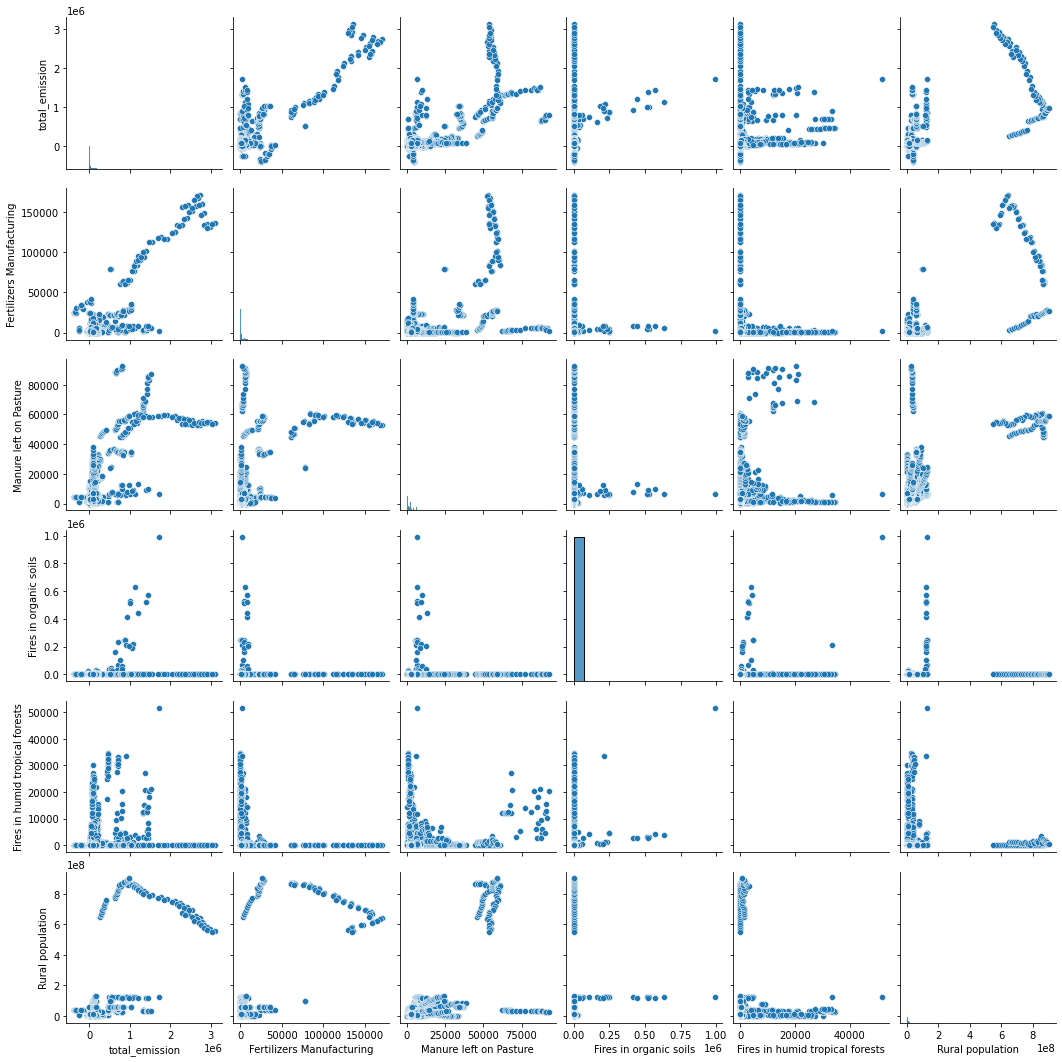

In [28]:
sns.pairplot(df4)
plt.show()

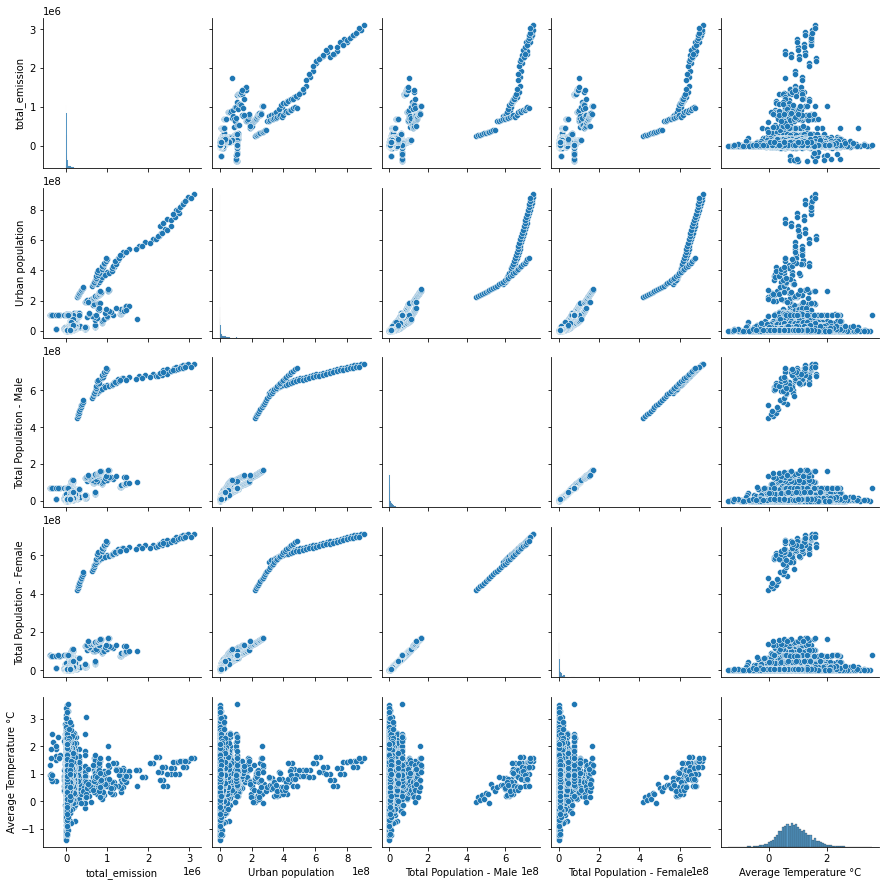

In [29]:
sns.pairplot(df5)
plt.show()

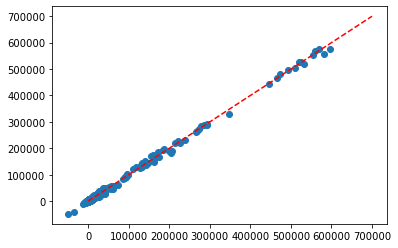

0.9971433361766948 0.9979516008387032
6244.404861338919
147769570.24578634
12156.050766831568


In [69]:
regressão_linear(base)

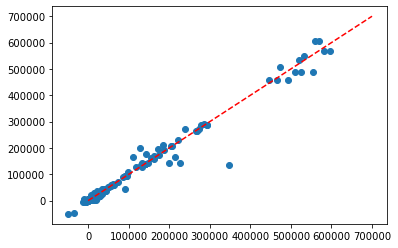

0.9977494839894453 0.9813802838552026
9936.860651275245
1343208640.5822303
36649.810921507225


In [102]:
arvore_decisao(base, max_depth=9)

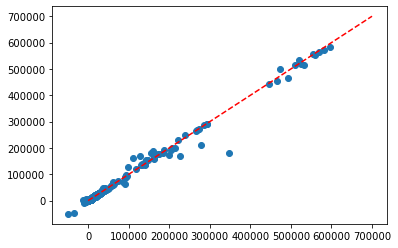

0.9988594160092049 0.9899513279429669
5822.791691196005
724901659.5323048
26923.997837102586


In [123]:
floresta_aleatoria(base, max_depth=12, criterion='friedman_mse')

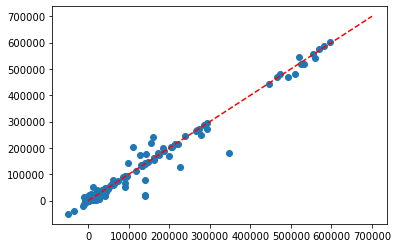

0.9940340004731516 0.9762880584431879
8642.198585230335
1710556946.0031846
41358.879892994984


In [213]:
knn(base, n_neighbors=2, p=5)

In [157]:
base2.head(2)

,total_emission,Savanna fires,Forest fires,Pesticides Manufacturing,Food Transport,Food Retail,Agrifood Systems Waste Disposal,Manure left on Pasture,Rural population,Urban population,Total Population - Male,Total Population - Female
0,2198.963539,14.7237,0.0557,11.807483,63.1152,109.6446,691.7888,1590.5319,9655167.0,2593947.0,5348387.0,5346409.0
1,2323.876629,14.7237,0.0557,11.712073,61.2125,116.6789,710.8212,1657.2364,10230490.0,2763167.0,5372959.0,5372208.0


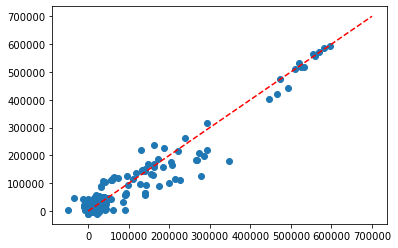

0.8980302843597757 0.9391041875330265
26270.402323409297
4392966082.018847
66279.45444871168


In [158]:
regressão_linear(base2)

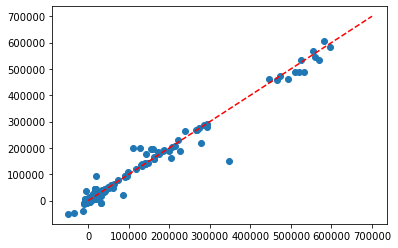

0.9998739989123051 0.9809598171470395
7629.673605403862
1373540709.6153846
37061.31014434574


In [190]:
arvore_decisao(base2, max_depth=17)

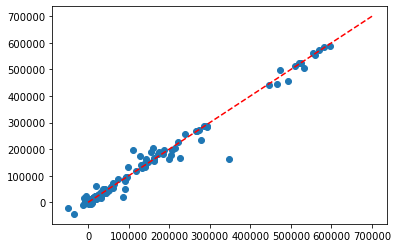

0.9983117533546423 0.9849373684118631
7274.236669005003
1086603938.6290765
32963.67604847913


In [208]:
floresta_aleatoria(base2, max_depth=14)

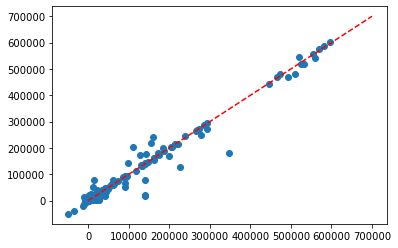

0.9928171142470761 0.9752812126688309
9146.473010344107
1783189844.0201552
42227.83257544904


In [227]:
knn(base2, n_neighbors=2)